# MSA 2024 Phase 2 - Part 1

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

### Loading the dataset
We chose to use the X store sales dataset.

Our goal is to use this dataset to train a model that can predict sales from 4 weeks to 12 weeks in the future

First, we load the dataset and look at its basic information. To avoid encoding errors, we set the encoding to `latin1`.

In [41]:
# Load the dataset
file_path = 'store_sales.csv'

# Set the encoding to 'latin1' to avoid encoding errors
store_sales = pd.read_csv(file_path, encoding='latin1')


### Display data
Initial presentation of the data, finding all the variables and understanding them

In [42]:
# Display basic information about the dataset
print("Dataset Information:")
store_sales.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   

In [61]:
# Display the first ten rows of the dataset
print("\nFirst Ten Rows:")
print(store_sales.head(10))


First Ten Rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
5      24  US-2017-156909   7/16/2017   7/18/2017    Second Class    SF-20065   
6      25  CA-2015-106320   9/25/2015   9/30/2015  Standard Class    EB-13870   
7      28  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
8      30  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
9      37  CA-2016-117590   12/8/2016  12/10/2016     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   

In [43]:
# Get descriptive statistics for the dataset
print("\nDescriptive Statistics:")
print(store_sales.describe())


Descriptive Statistics:
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


In [ ]:
# Convert date columns to datetime
store_sales['Order Date'] = pd.to_datetime(store_sales['Order Date'], format='%m/%d/%Y')
store_sales['Ship Date'] = pd.to_datetime(store_sales['Ship Date'], format='%m/%d/%Y')

# Confirm the changes
print("\nData Types after Conversion:")
print(store_sales.dtypes)

## 2. Visualise data

### Find all non-numeric colums and initial visualise

In [44]:
# Find all non-numeric columns
non_numeric_columns = store_sales.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')


Visualisation is based on the non-numeric columns found, and is ignored for uniquely identifiable records such as IDs.

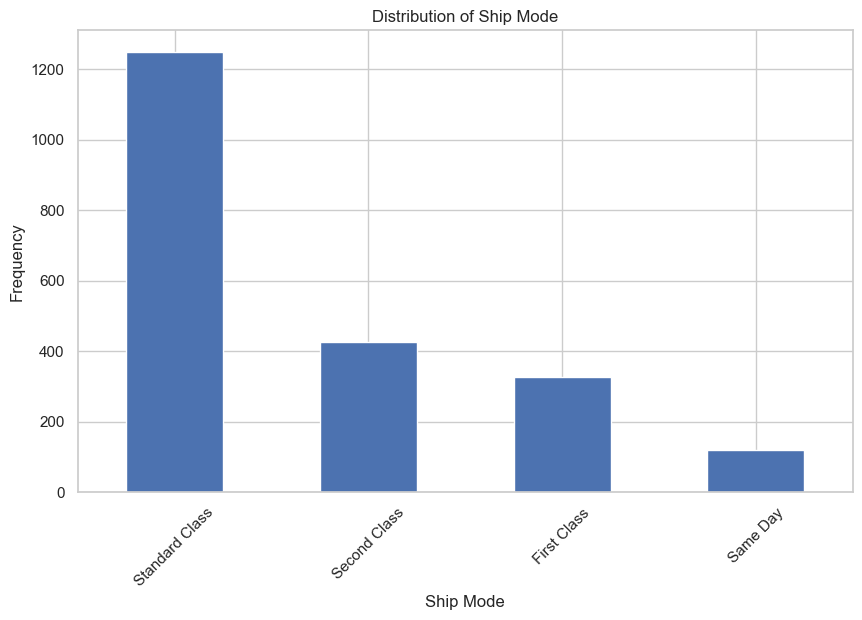

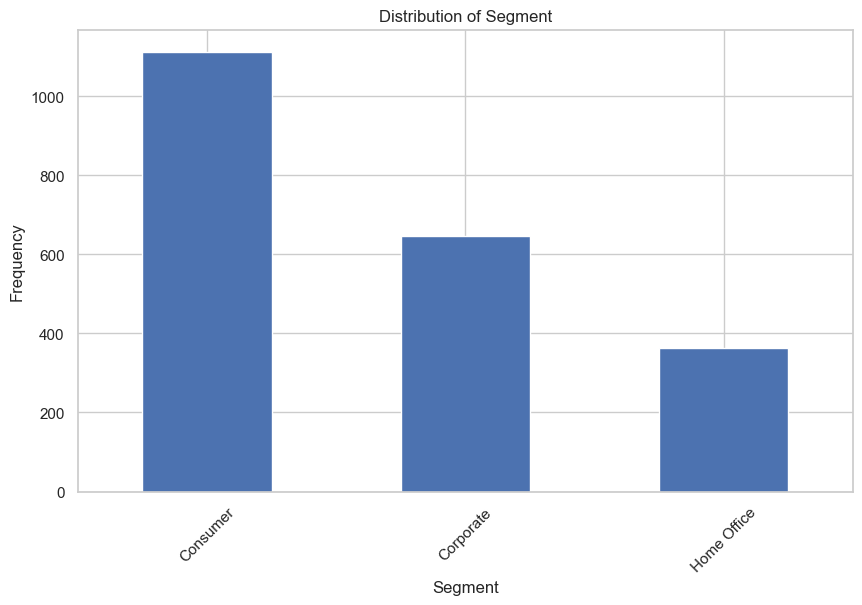

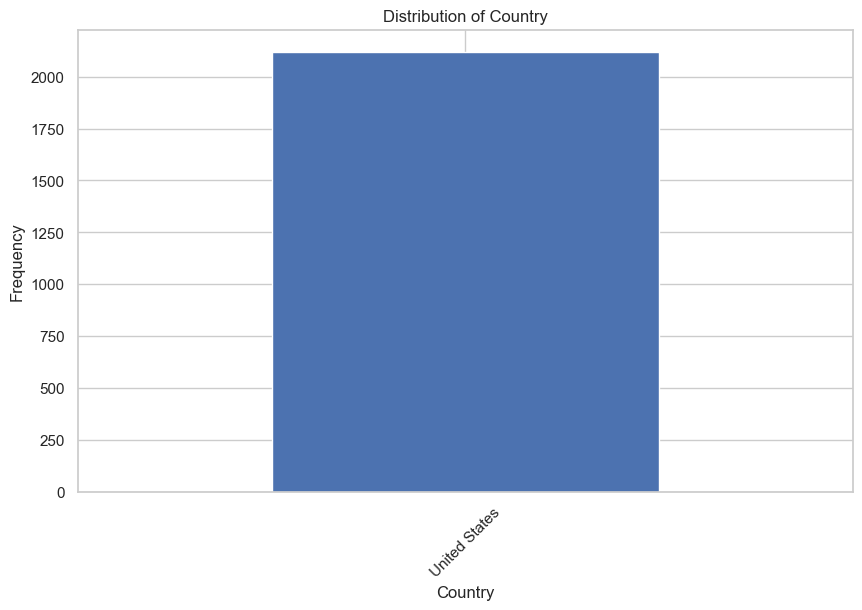

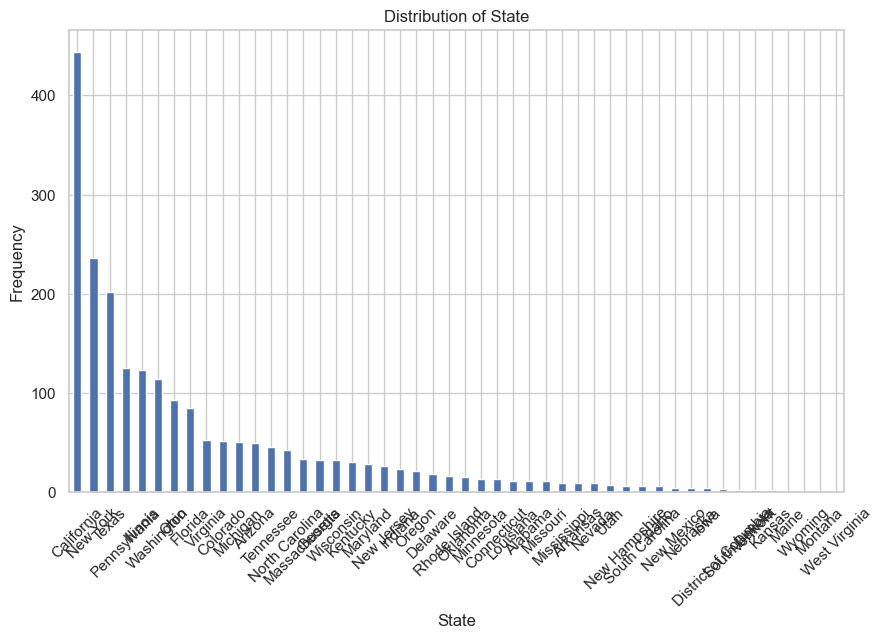

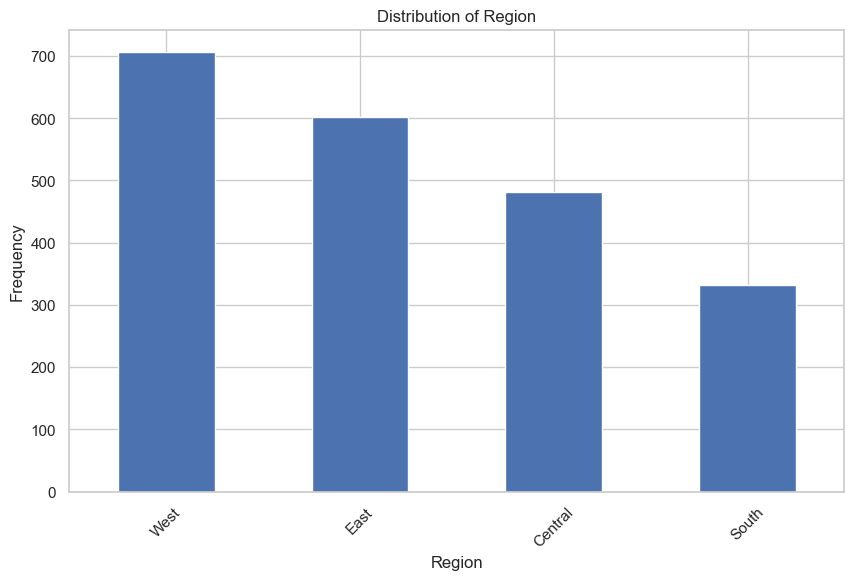

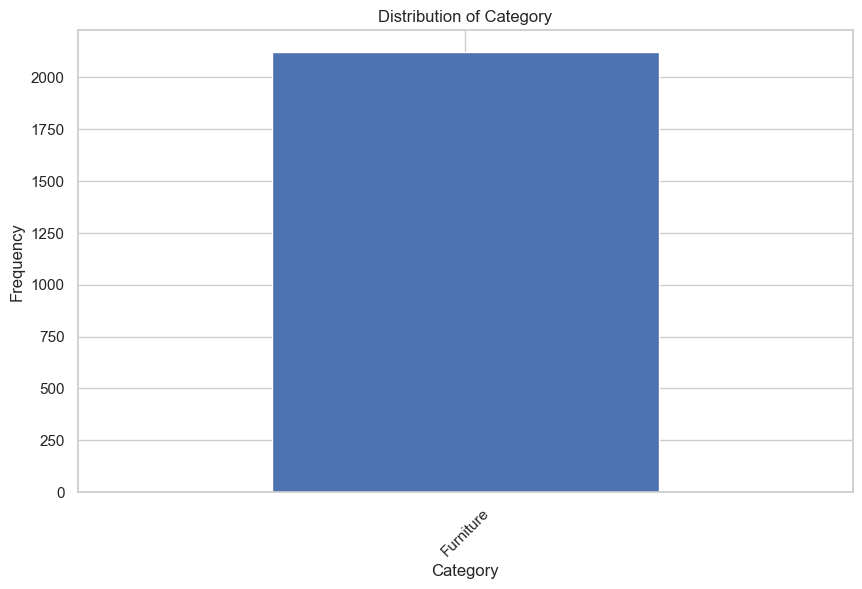

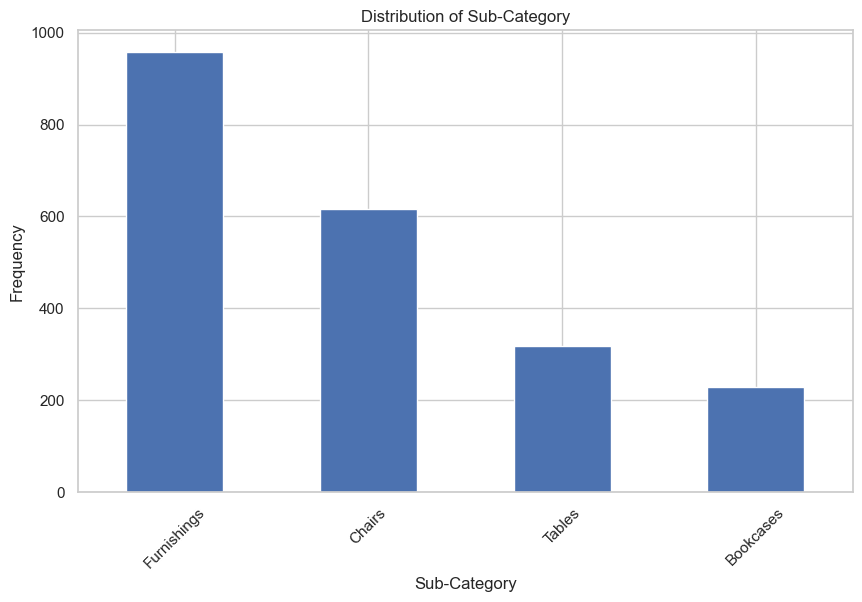

C:\Users\chenz\AppData\Local\Temp\ipykernel_49628\2077033410.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales.set_index(column).resample('M').size().plot(kind='line')


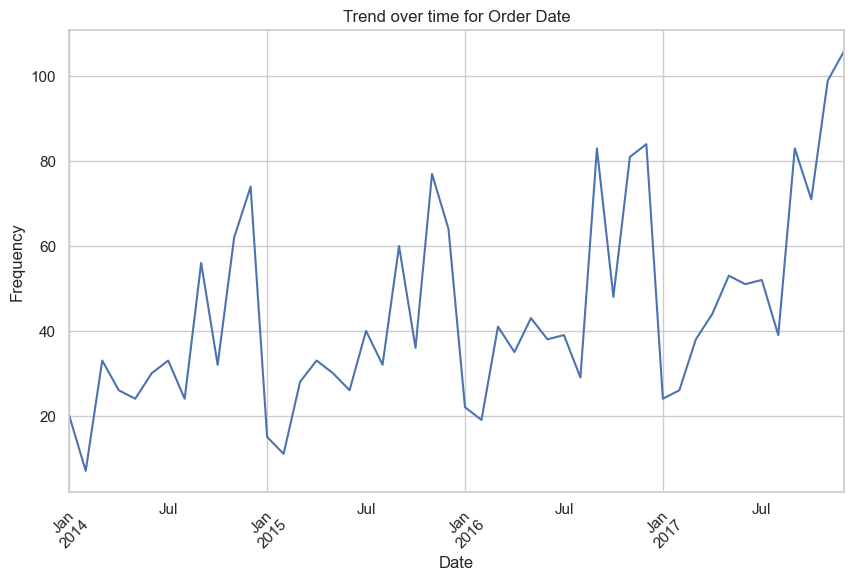

C:\Users\chenz\AppData\Local\Temp\ipykernel_49628\2077033410.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales.set_index(column).resample('M').size().plot(kind='line')


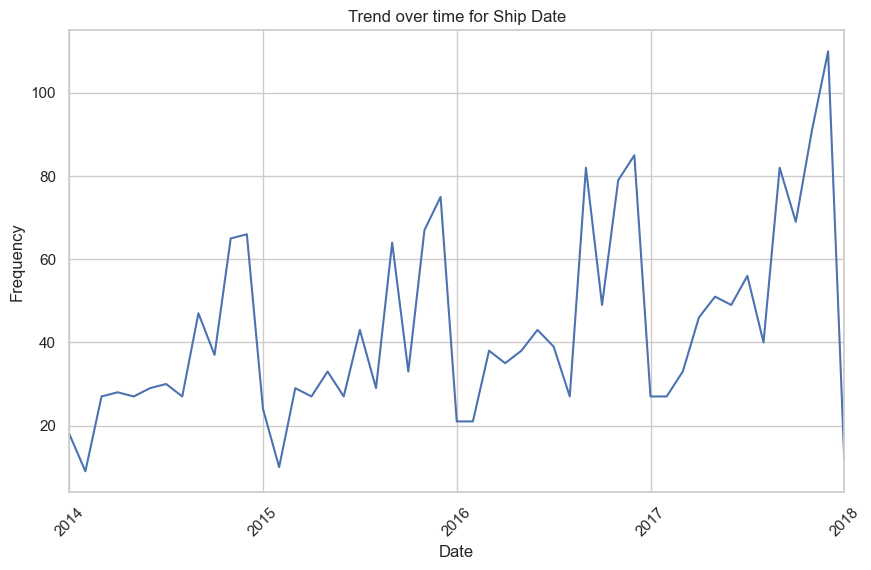

In [45]:
# visualize the distribution of categorical data
def visualize_categorical_data(column):
    plt.figure(figsize=(10, 6))
    store_sales[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# visualize the trend over time for date data
def visualize_date_data(column):
    store_sales[column] = pd.to_datetime(store_sales[column])
    plt.figure(figsize=(10, 6))
    store_sales.set_index(column).resample('M').size().plot(kind='line')
    plt.title(f'Trend over time for {column}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# categorical data columns
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'State', 'Region', 'Category', 'Sub-Category']

# date data columns
date_columns = ['Order Date', 'Ship Date']

# visualize categorical data
for column in categorical_columns:
    visualize_categorical_data(column)

# visualize date data
for column in date_columns:
    visualize_date_data(column)

### Visualisation of categorical features and sales
From the visualisation of the non-numeric columns we can see that some categories only exist in one category and we need to remove these columns subsequently, in addition the order and shipping date show the time period trend of the order

Next, we visualise the categorical data and sales, and by showing the total number of sales for each category we can see how they relate to sales

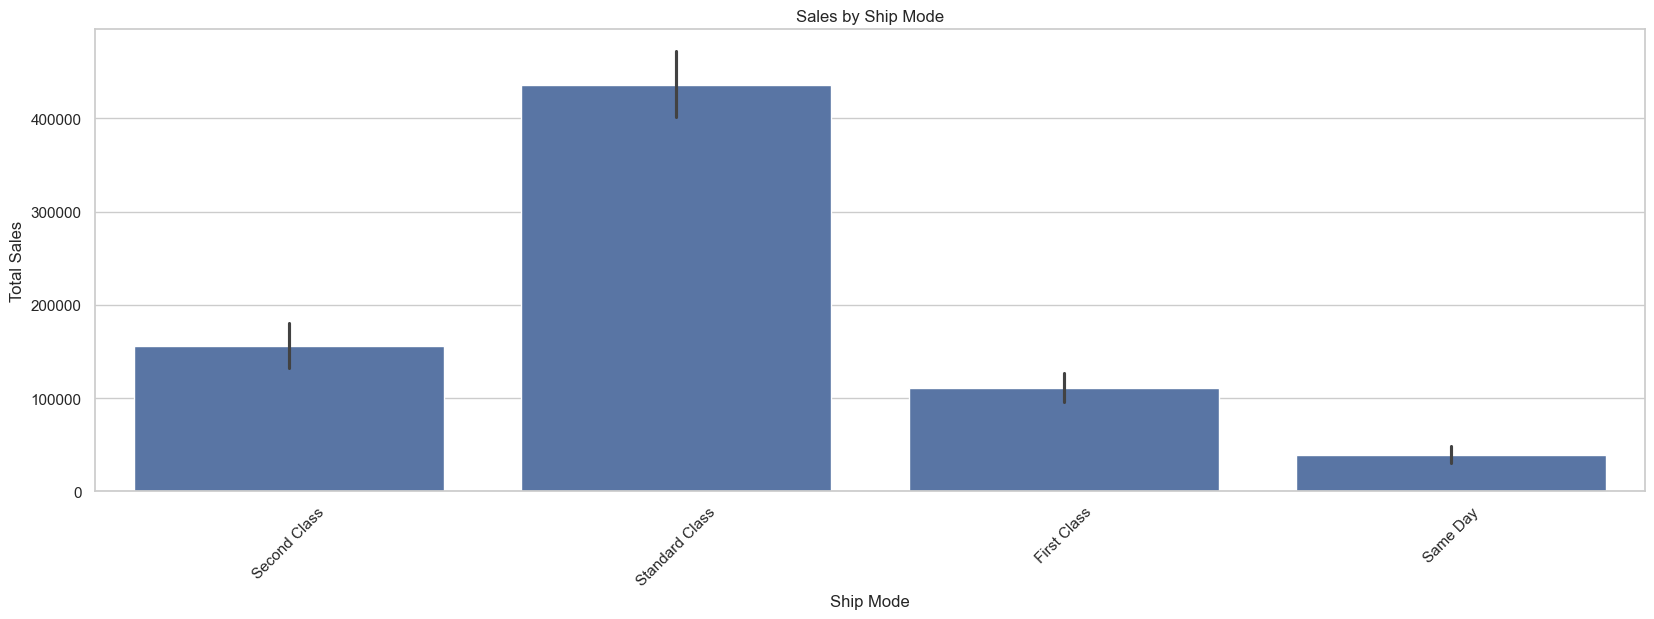

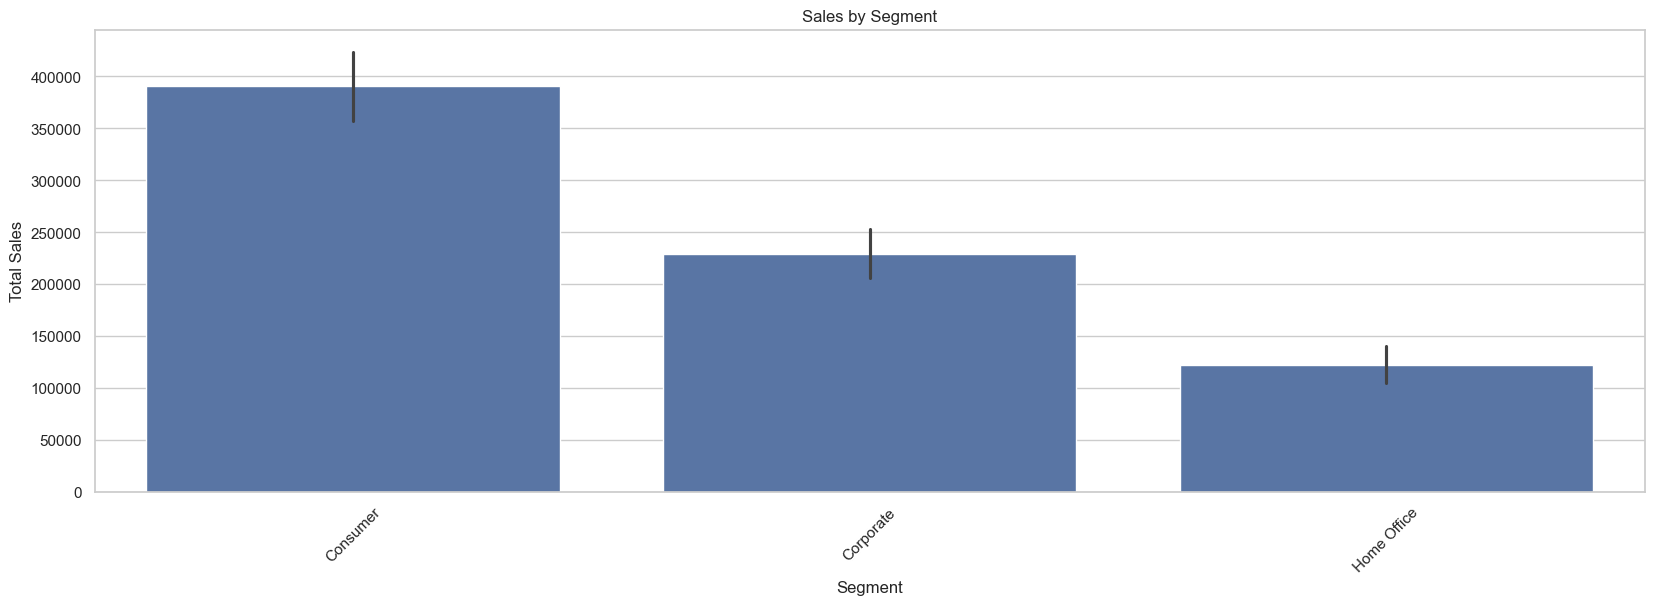

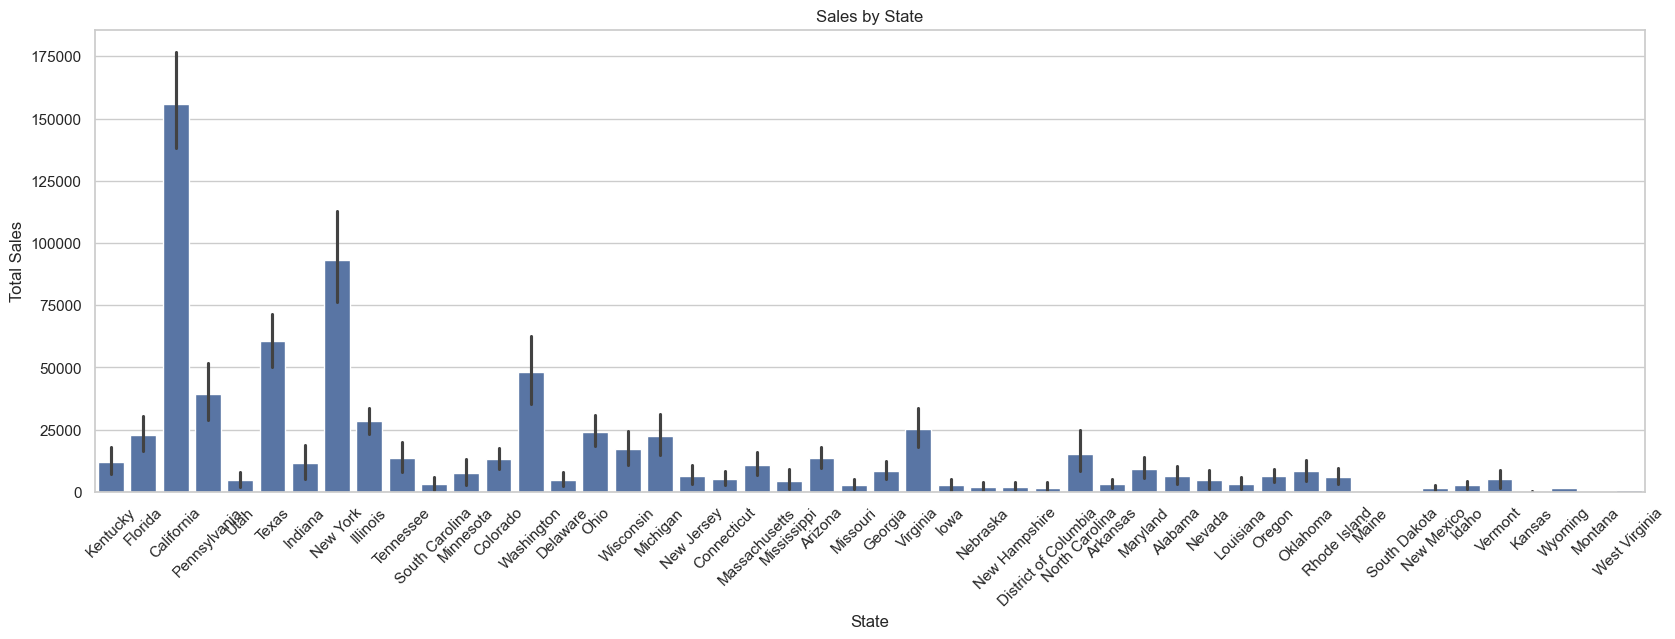

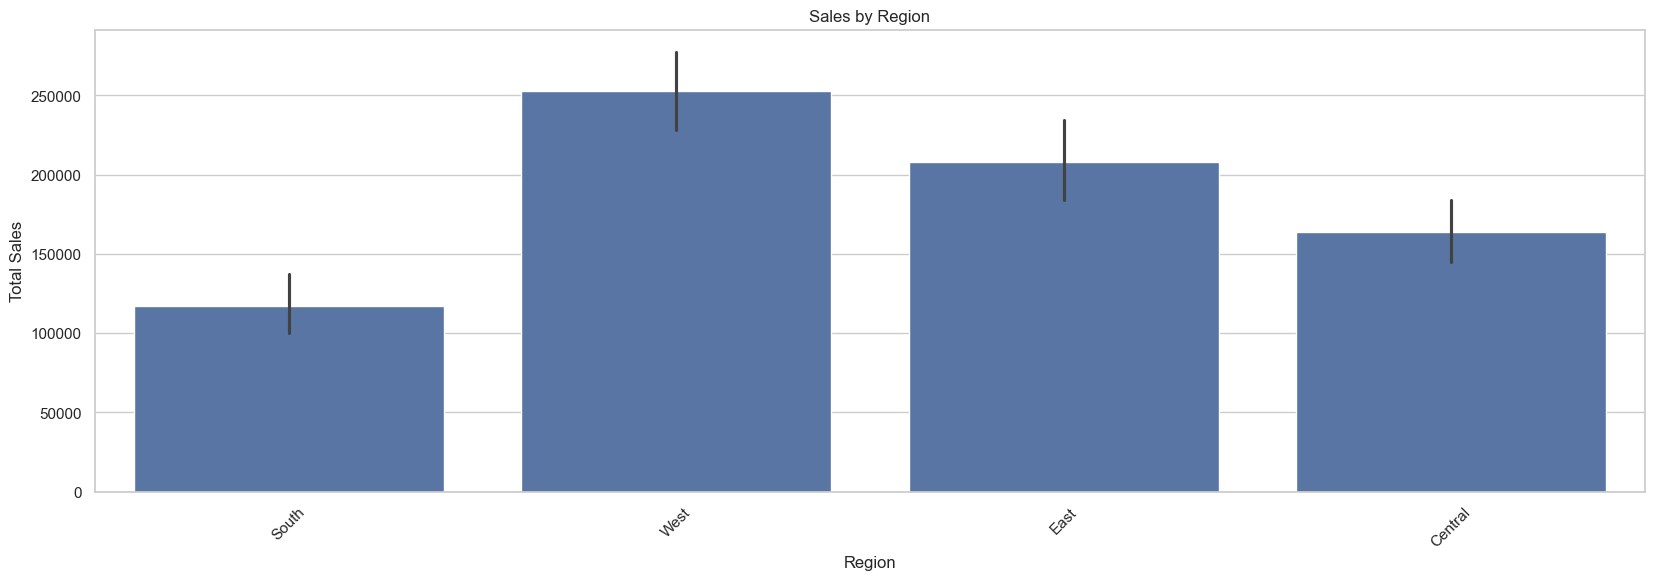

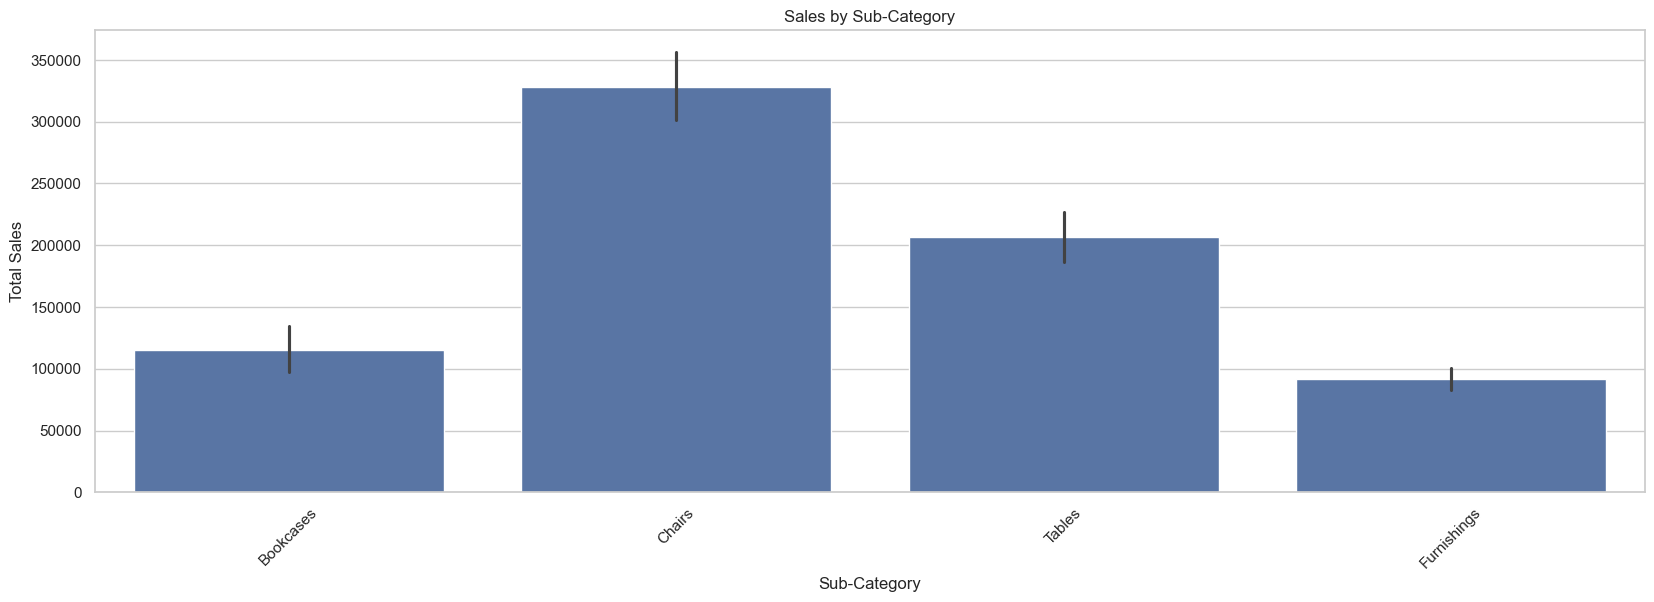

In [62]:
# Visualize the distribution of categorical data
def visualize_categorical_sales(column):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=column, y='Sales', data=store_sales, estimator=sum)
    plt.title(f'Sales by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

# Categorical data columns (exclude Country and Category)
categorical_columns = ['Ship Mode', 'Segment', 'State', 'Region', 'Sub-Category']

# Visualising the relationship between segmented data and sales
for column in categorical_columns:
    visualize_categorical_sales(column)

### Time feature decomposition and visualisation
To uncover deeper relationships between temporal characteristics and sales, we disaggregate the time series into various features:

1. **Date-related features**:
   - **Purpose**: Identify seasonal and cyclical trends in sales and the impact of specific time periods (e.g., weekends, holidays) on sales.

2. **Lagging features**:
   - **Purpose**: Capture the lagging effect of sales and understand the impact of past sales on current sales.

3. **Rolling features**:
   - **Purpose**: Identify trends and stability in sales over time, aiding in forecasting and analyzing sales performance.

4. **Time lag characteristics**:
   - **Purpose**: Assess the impact of dispatch speeds on sales and identify potential issues in the supply chain.

In [47]:
# Transform the date columns into correct format
store_sales['Order Date'] = pd.to_datetime(store_sales['Order Date'])
store_sales['Ship Date'] = pd.to_datetime(store_sales['Ship Date'])

# Create date-related features (Year, Month, Quarter, Weekday, Day)
store_sales['Year'] = store_sales['Order Date'].dt.year
store_sales['Month'] = store_sales['Order Date'].dt.month
store_sales['Quarter'] = store_sales['Order Date'].dt.quarter
store_sales['Weekday'] = store_sales['Order Date'].dt.weekday
store_sales['Day'] = store_sales['Order Date'].dt.day

# Creating lagging features (first 4 to 12 weeks of sales)
for lag in range(1, 13):
    store_sales[f'Sales_lag_{lag}'] = store_sales['Sales'].shift(lag)

# Creating rolling statistical features
store_sales['Rolling_Mean_4'] = store_sales['Sales'].rolling(window=4).mean().shift(1)
store_sales['Rolling_Std_4'] = store_sales['Sales'].rolling(window=4).std().shift(1)
store_sales['Rolling_Mean_12'] = store_sales['Sales'].rolling(window=12).mean().shift(1)
store_sales['Rolling_Std_12'] = store_sales['Sales'].rolling(window=12).std().shift(1)

# Creating time-gap features
store_sales['Order_to_Ship_Days'] = (store_sales['Ship Date'] - store_sales['Order Date']).dt.days

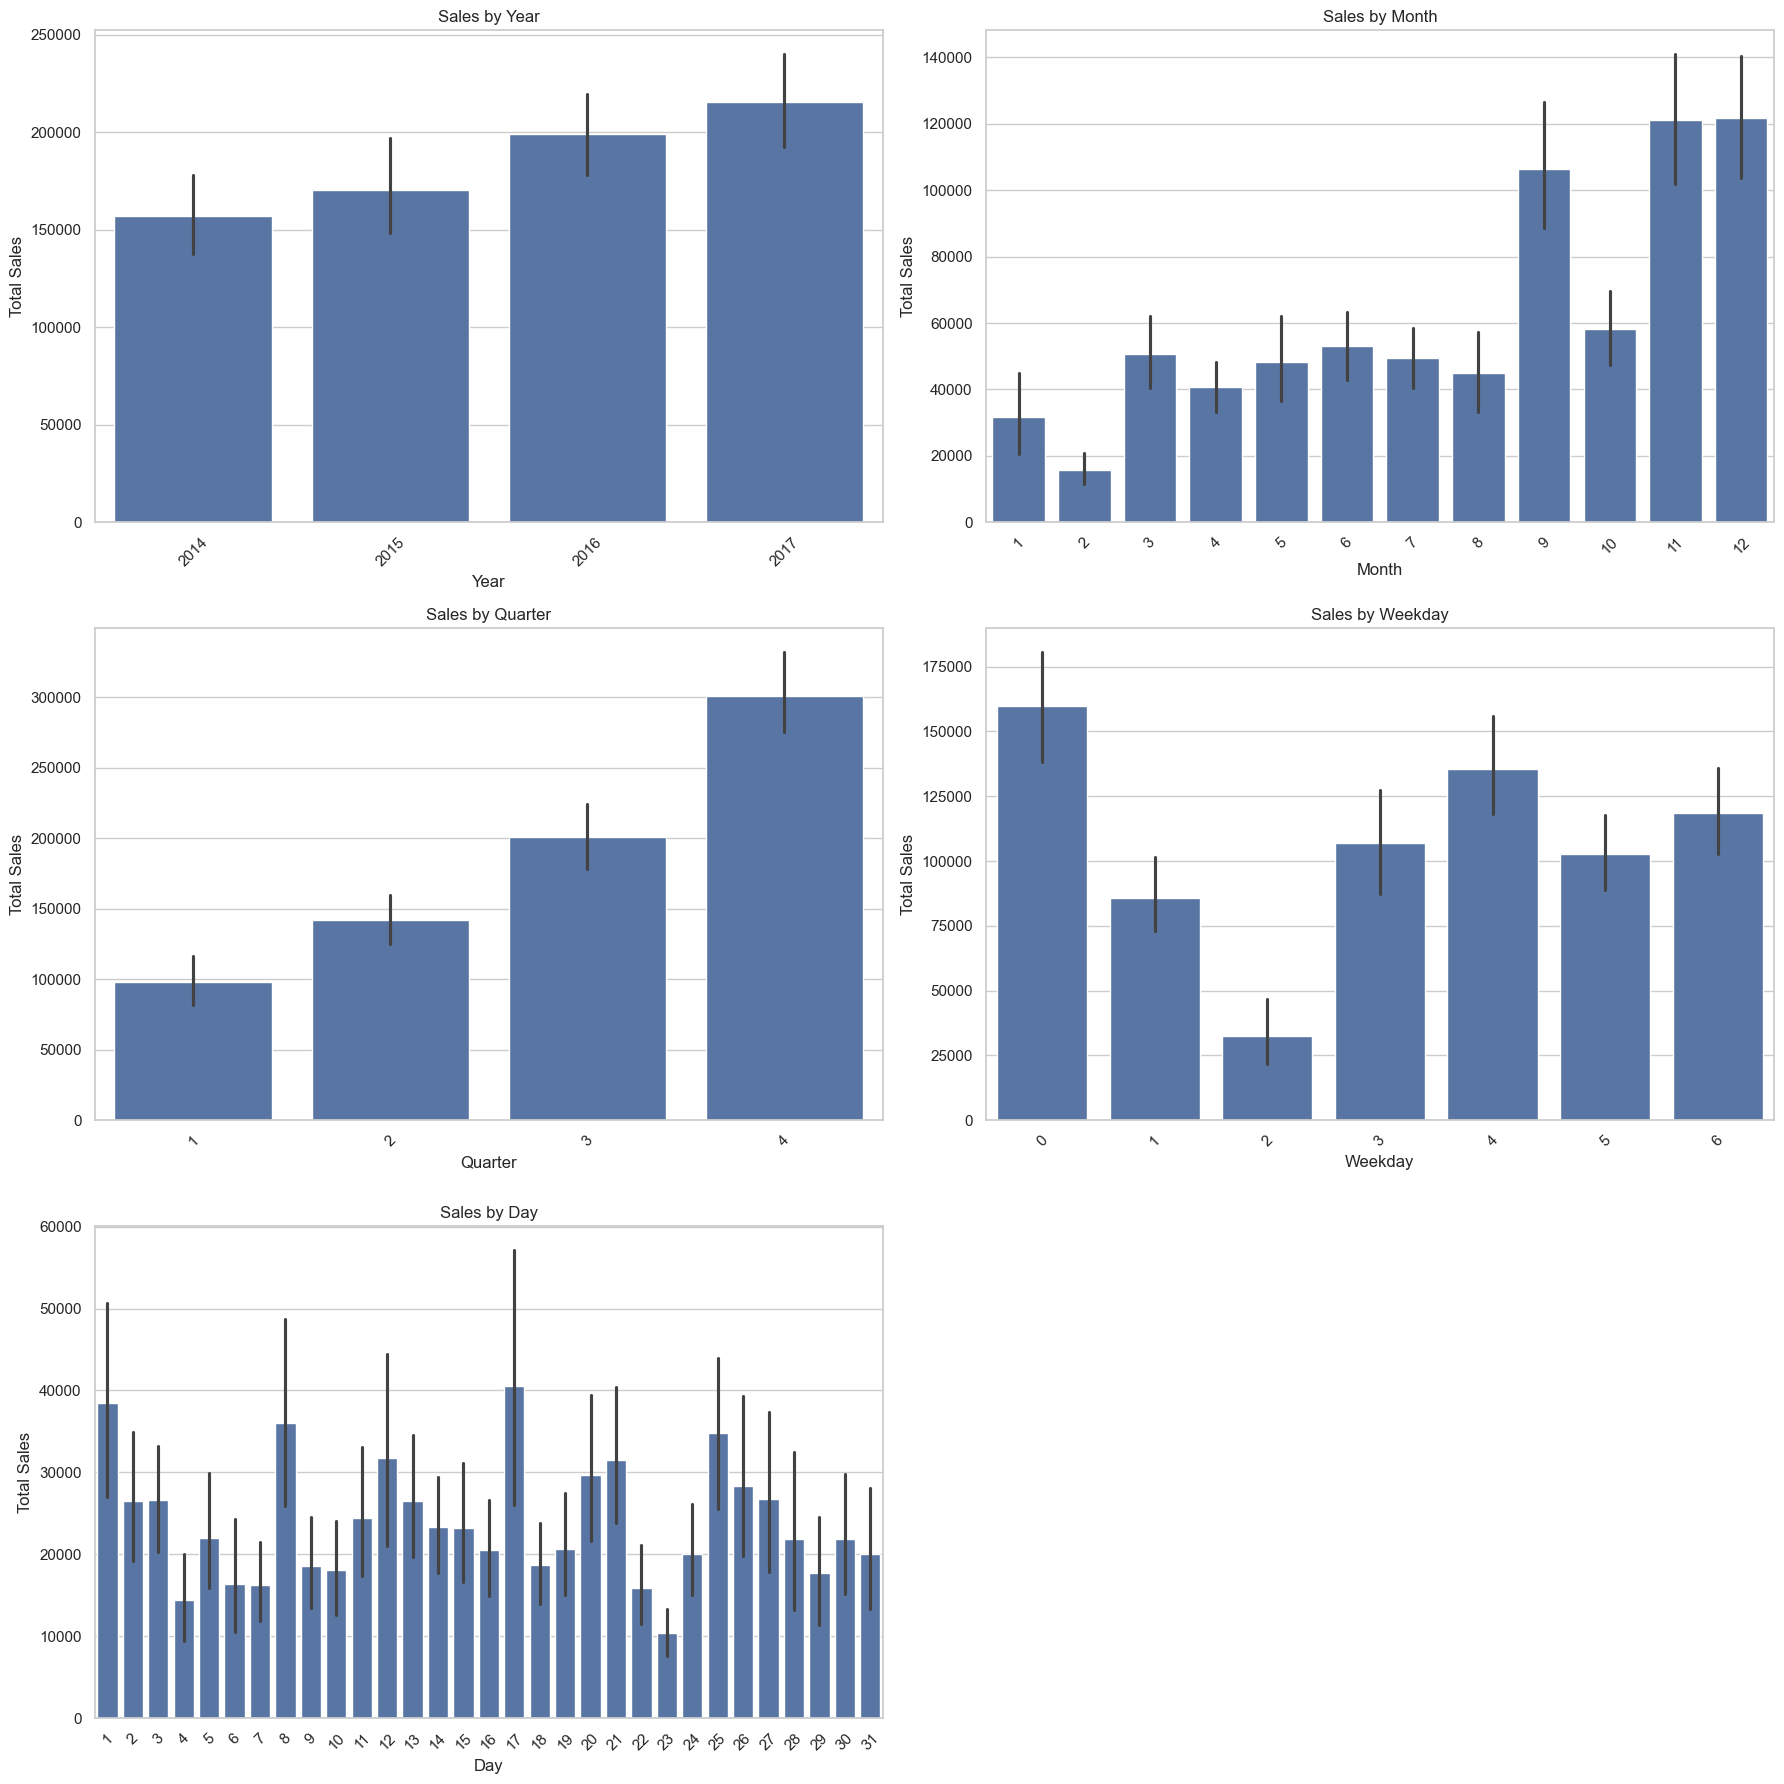

In [48]:
# Visualising date-related features and sales
def plot_time_feature_sales(store_sales):
    time_features = ['Year', 'Month', 'Quarter', 'Weekday', 'Day']
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

    for ax, feature in zip(axes.flatten(), time_features):
        sns.barplot(x=feature, y='Sales', data=store_sales, estimator=sum, ax=ax)
        ax.set_title(f'Sales by {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Total Sales')
        ax.tick_params(axis='x', rotation=45)

    # Remove the empty subplot (if any)
    if len(time_features) % 2 != 0:
        fig.delaxes(axes[-1, -1])

    plt.tight_layout()
    plt.show()

plot_time_feature_sales(store_sales)

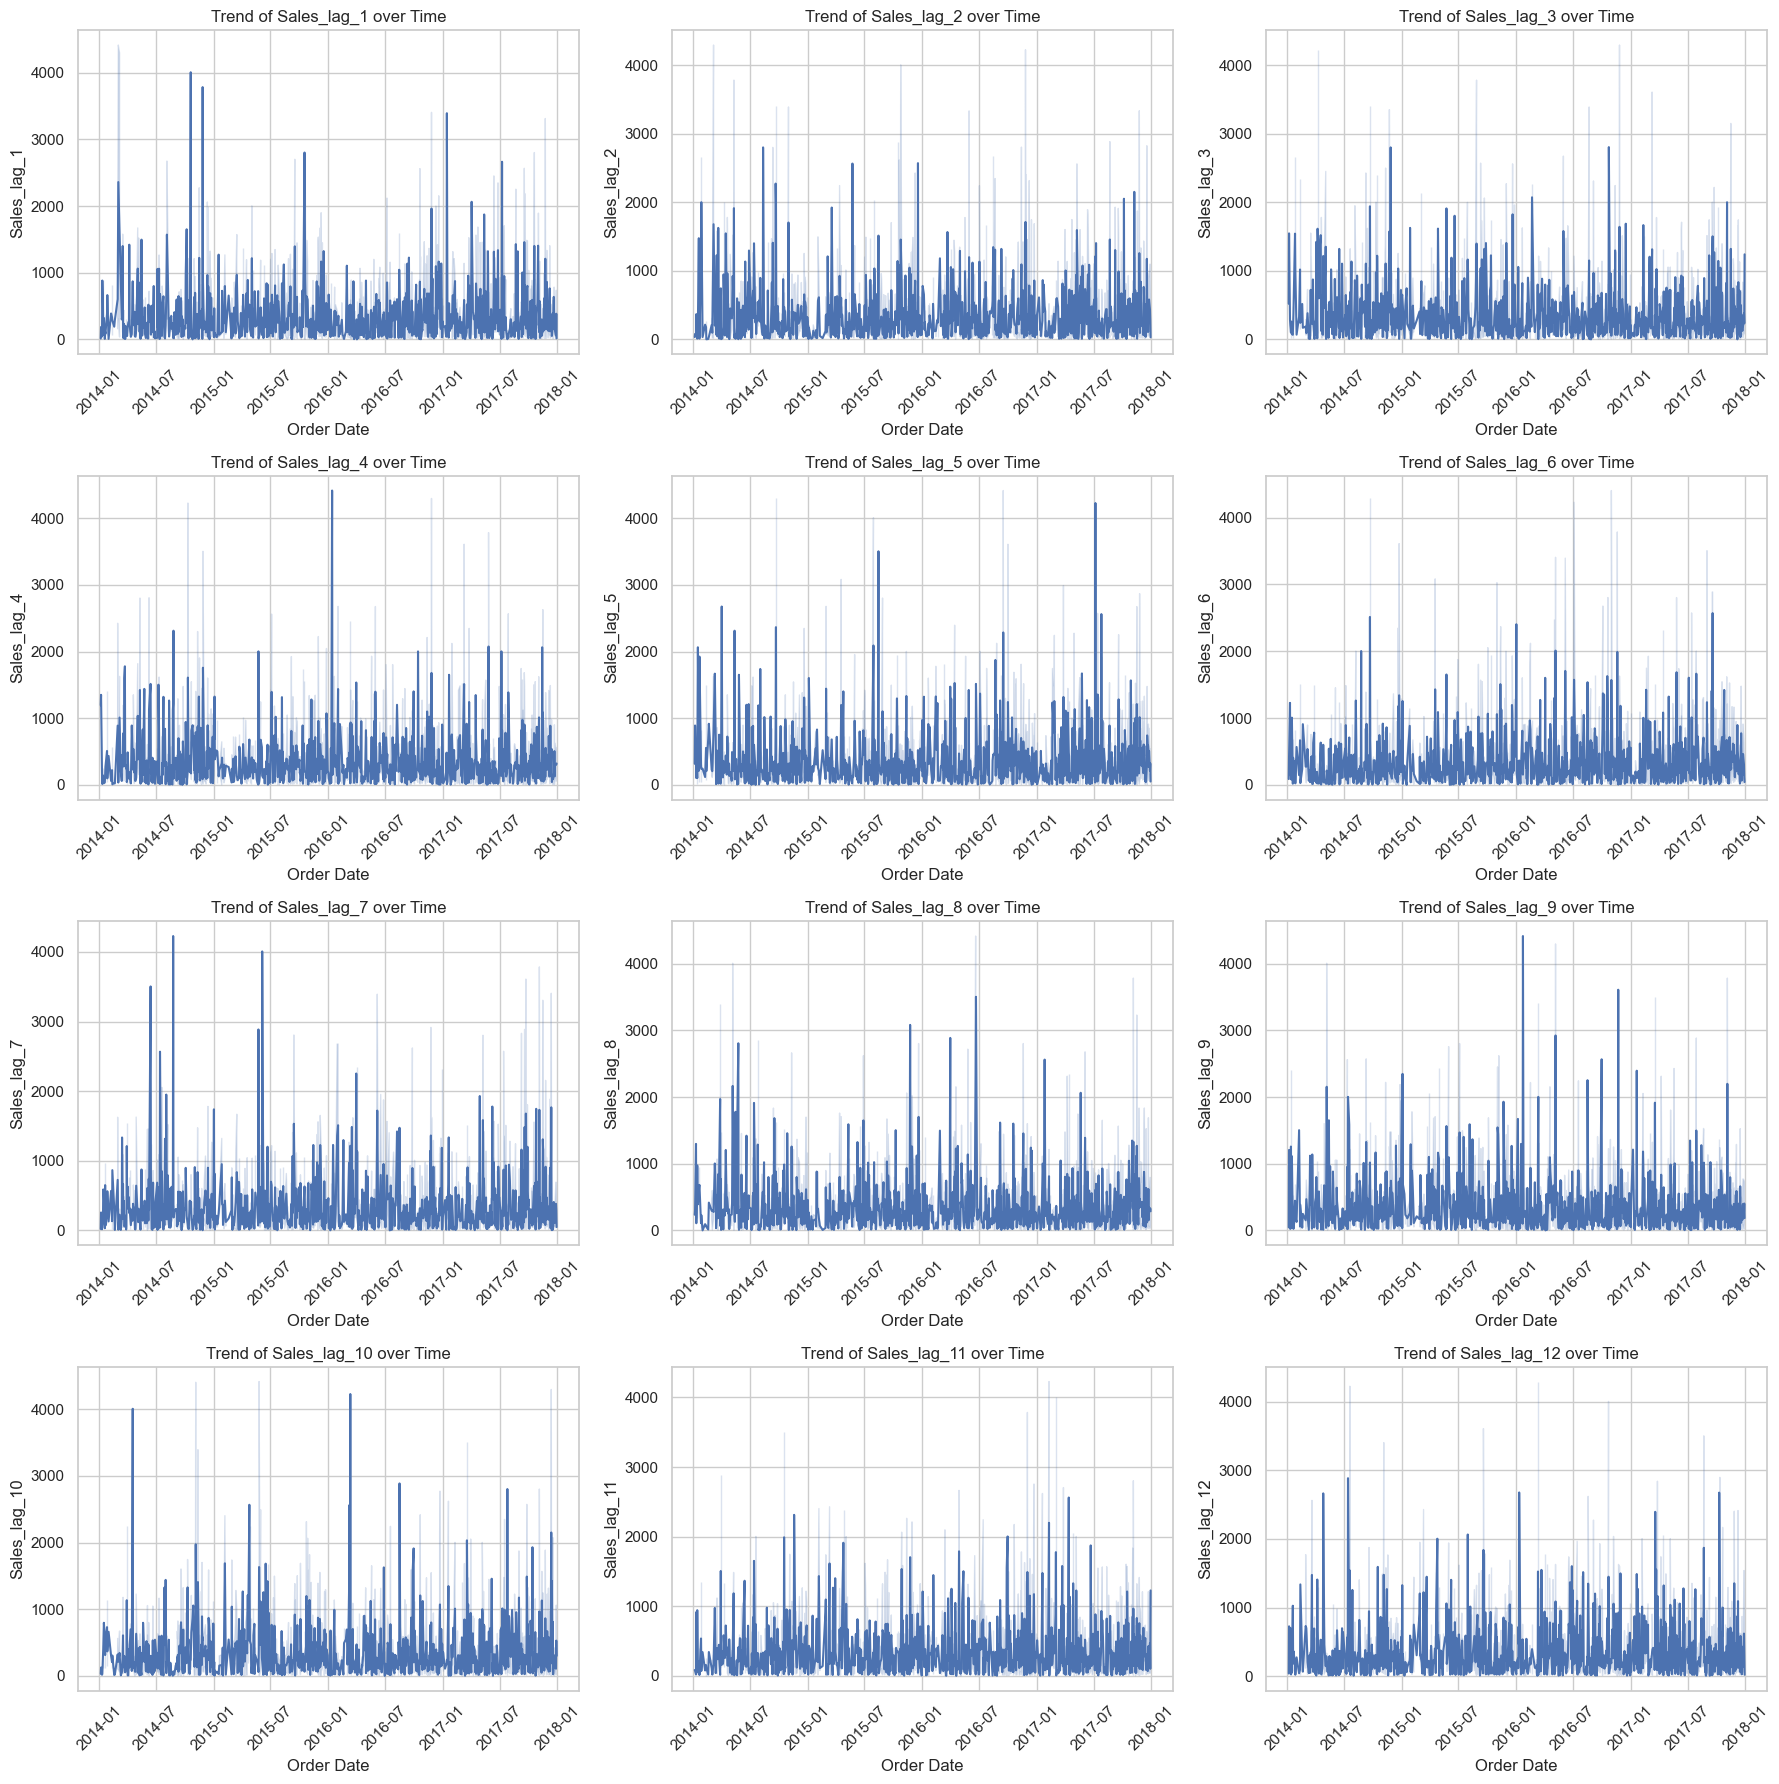

In [49]:
# Visualising lagging features and sales
def plot_lag_features(store_sales):
    lag_features = [f'Sales_lag_{lag}' for lag in range(1, 13)]
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

    for ax, feature in zip(axes.flatten(), lag_features):
        sns.lineplot(data=store_sales, x='Order Date', y=feature, ax=ax)
        ax.set_title(f'Trend of {feature} over Time')
        ax.set_xlabel('Order Date')
        ax.set_ylabel(feature)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_lag_features(store_sales)

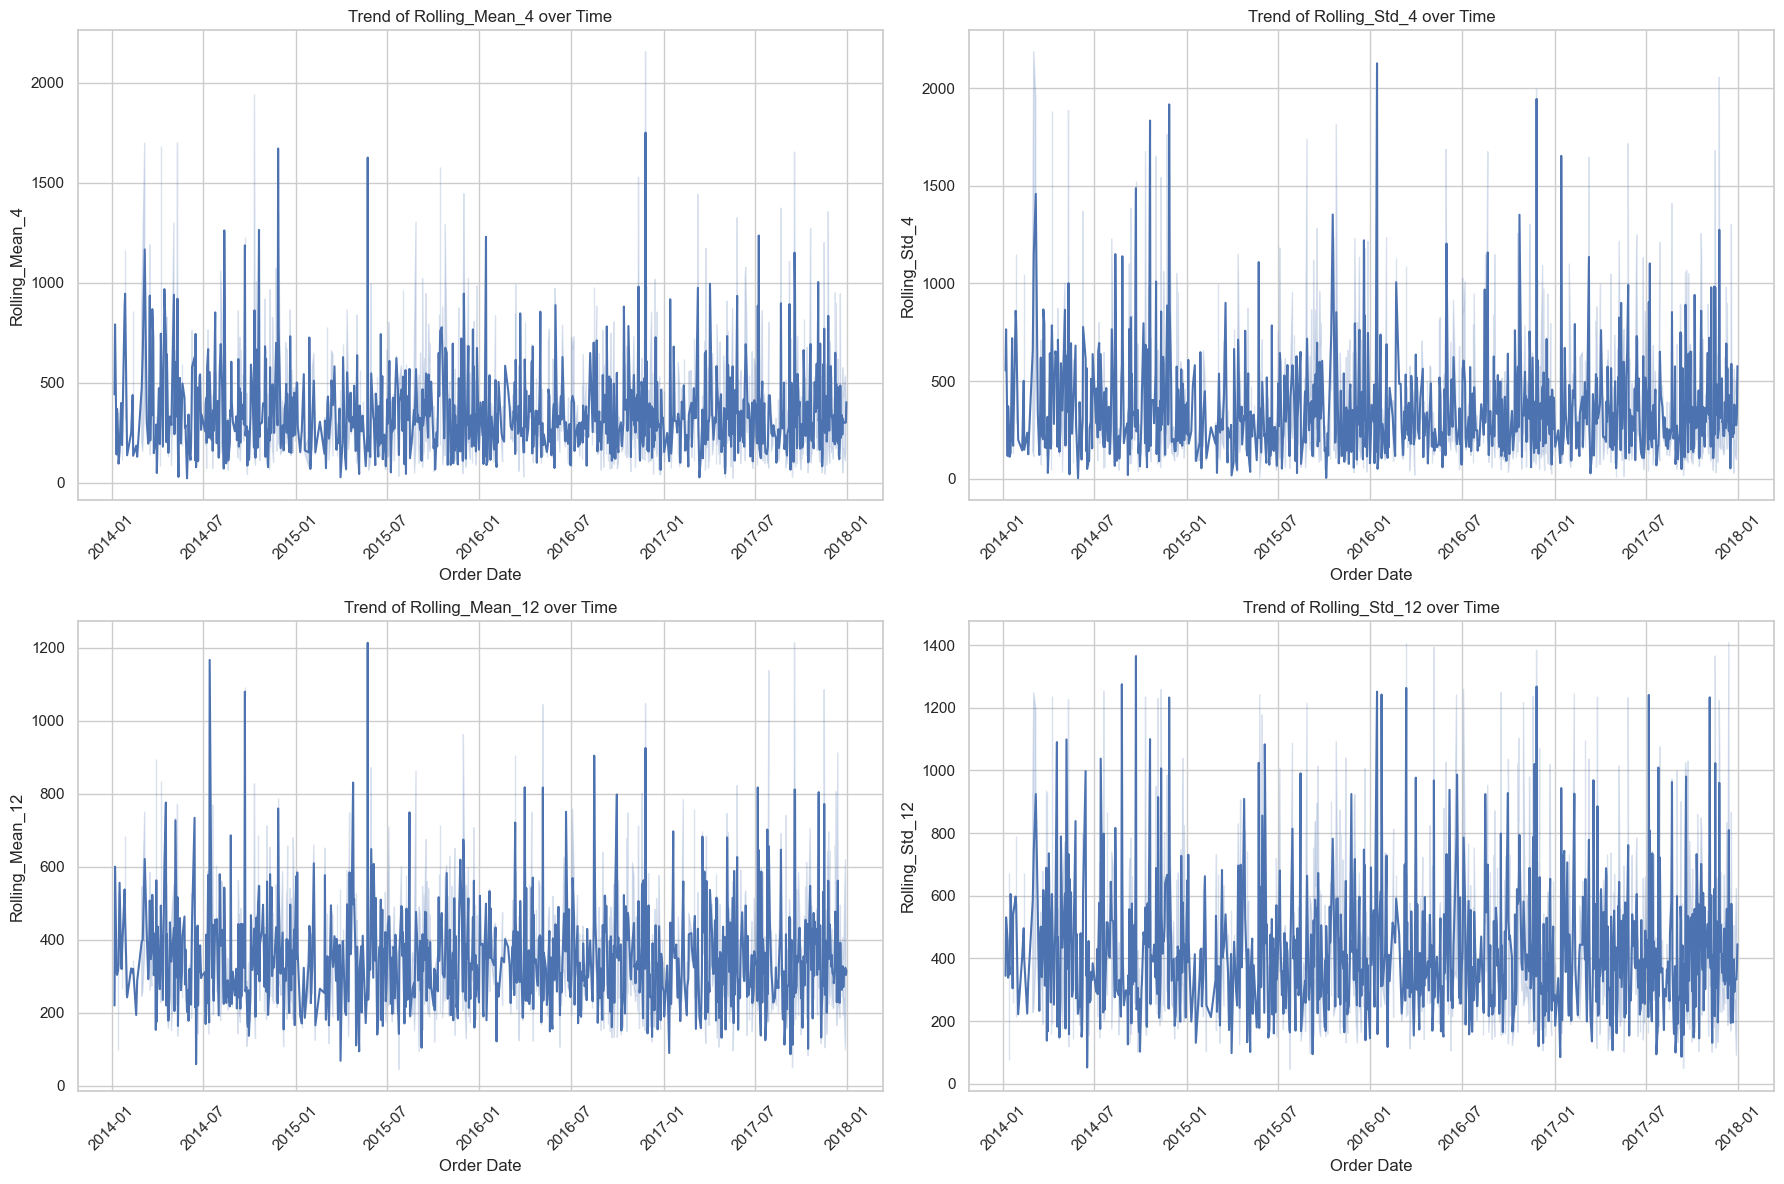

In [50]:
# Visualising rolling statistical features and sales
def plot_rolling_features(store_sales):
    rolling_features = ['Rolling_Mean_4', 'Rolling_Std_4', 'Rolling_Mean_12', 'Rolling_Std_12']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

    for ax, feature in zip(axes.flatten(), rolling_features):
        sns.lineplot(data=store_sales, x='Order Date', y=feature, ax=ax)
        ax.set_title(f'Trend of {feature} over Time')
        ax.set_xlabel('Order Date')
        ax.set_ylabel(feature)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_rolling_features(store_sales)

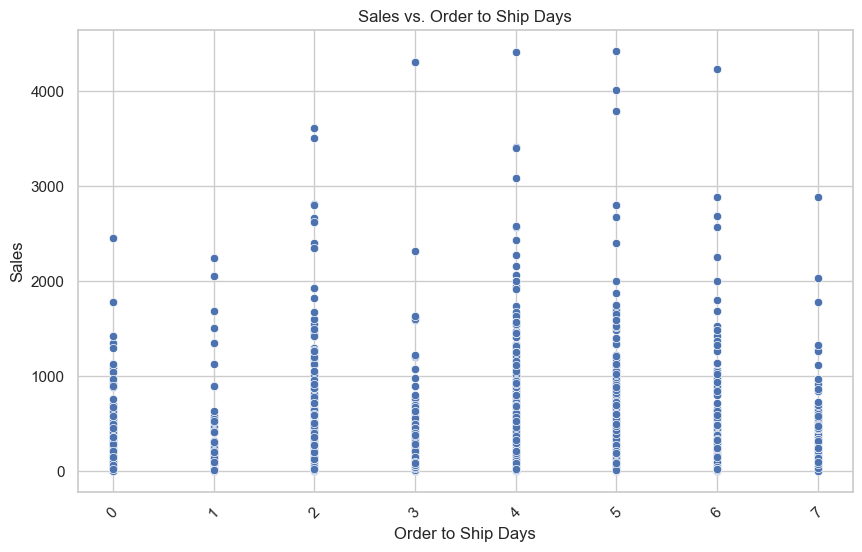

In [51]:
# Visualising time-gap features and sales
def plot_order_to_ship_days(store_sales):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=store_sales, x='Order_to_Ship_Days', y='Sales')
    plt.title('Sales vs. Order to Ship Days')
    plt.xlabel('Order to Ship Days')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.show()

plot_order_to_ship_days(store_sales)

### Numerical column visualisation

Show count distribution of numeric columns

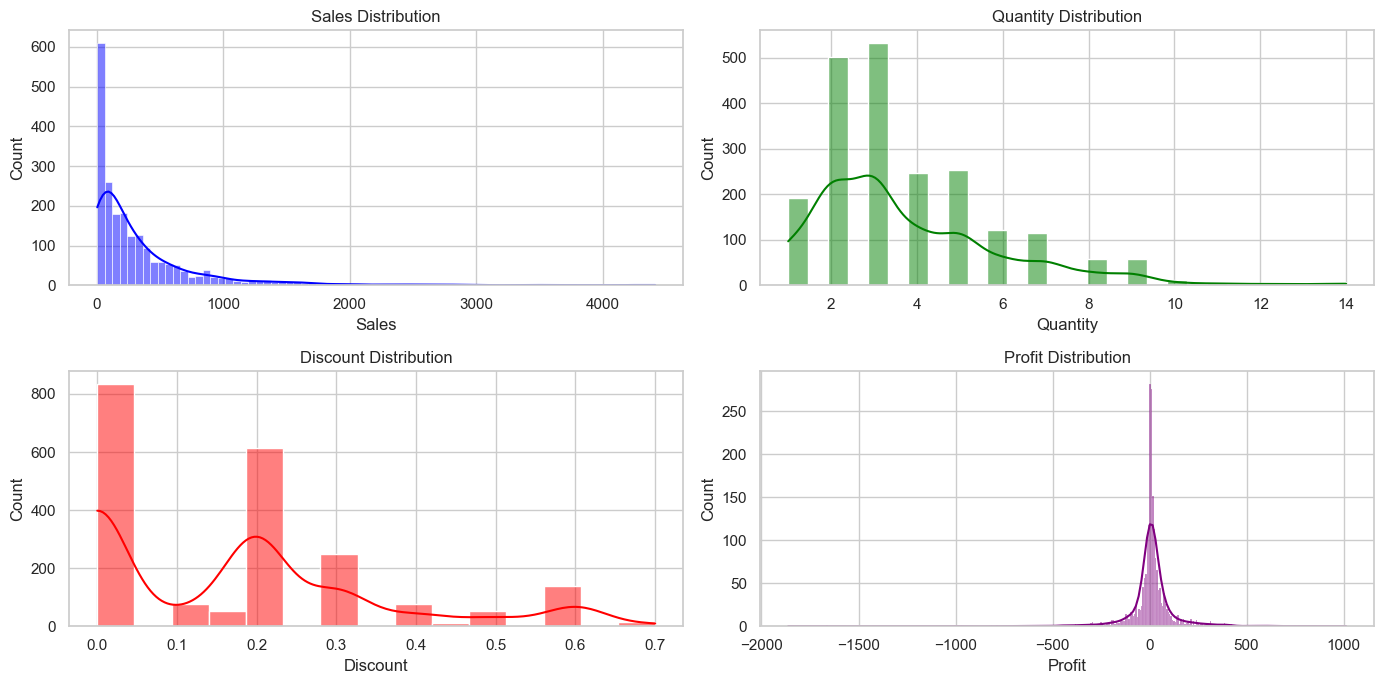

In [54]:
# Reload the dataset, ensure that the data source is correct
file_path = 'store_sales.csv'

# Set the encoding to 'latin1' to avoid encoding errors
store_sales = pd.read_csv(file_path, encoding='latin1')

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Plot Sales
plt.subplot(2, 2, 1)
sns.histplot(store_sales['Sales'], kde=True, color='blue')
plt.title('Sales Distribution')

# Plot Quantity
plt.subplot(2, 2, 2)
sns.histplot(store_sales['Quantity'], kde=True, color='green')
plt.title('Quantity Distribution')

# Plot Discount
plt.subplot(2, 2, 3)
sns.histplot(store_sales['Discount'], kde=True, color='red')
plt.title('Discount Distribution')

# Plot Profit
plt.subplot(2, 2, 4)
sns.histplot(store_sales['Profit'], kde=True, color='purple')
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()

Visualising relationships between columns of values using scatterplots

C:\Users\chenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


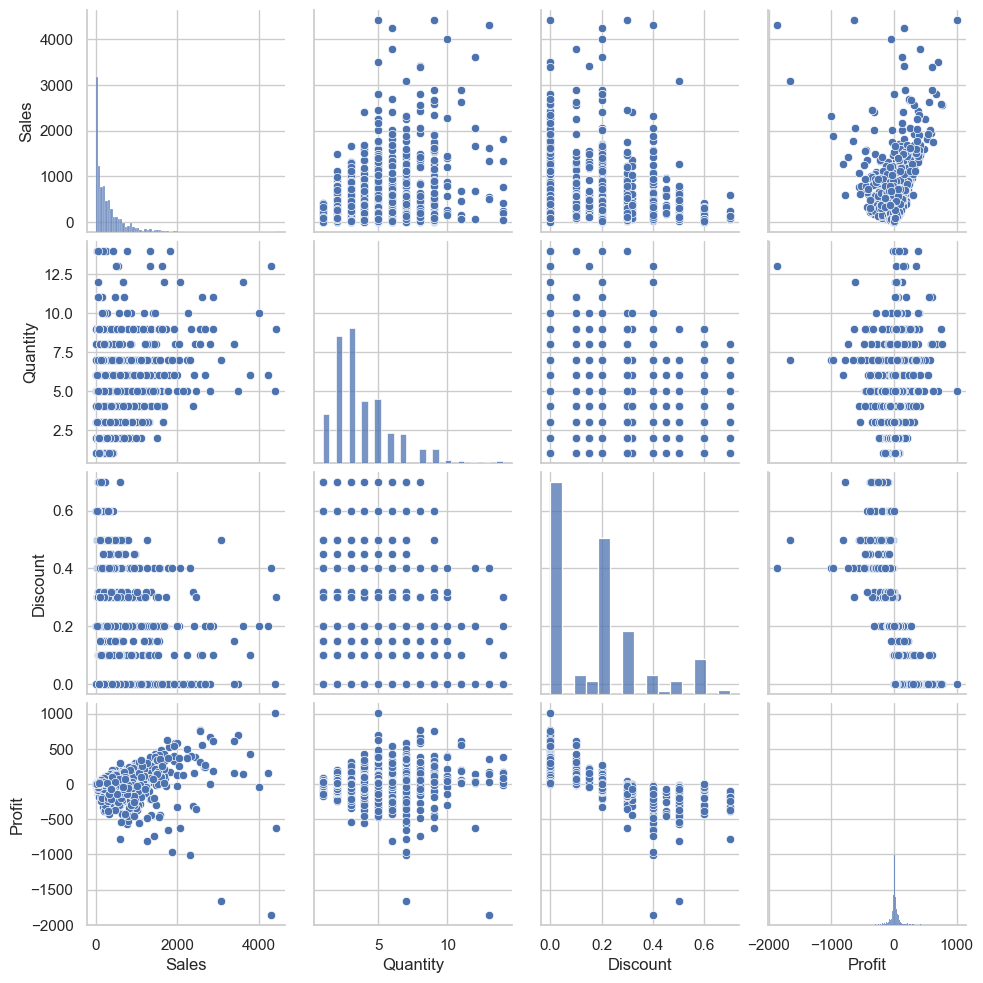

In [57]:
# 数值列
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Visualising relationships using scatterplots
def visualize_scatter_matrix(columns):
    sns.pairplot(store_sales[columns])
    plt.show()

visualize_scatter_matrix(numeric_columns)

## 2. Clean data
After we have visualised and analysed the data we perform data cleansing
Our aim is to predict future sales, so we can remove features that are clearly not useful for sales, including IDs, Categories and Country

In addition, ProductName is a text feature, which is usually made into a feature for each word using the TF-IDF approach, but this results in a large increase in the dimensionality of the feature set adding extra overhead for training and pre-processing, and we remove the ProductName feature when there is no clear need for it.

### Removal of useless features, initial check for missing values

In [36]:
# Load the dataset
file_path = 'store_sales.csv'
# Set the encoding to 'latin1' to avoid encoding errors
store_sales = pd.read_csv(file_path, encoding='latin1')

# Removal of features with no apparent relationship to sales
store_sales.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name'], inplace=True)

# If all the data comes from one country, you can delete the Country column.
if store_sales['Country'].nunique() == 1:
    store_sales.drop(columns=['Country'], inplace=True)
# If all the data comes from one country, you can delete the Country column.
if store_sales['Category'].nunique() == 1:
    store_sales.drop(columns=['Category'], inplace=True)

# Display basic information about the dataset
print("Dataset Information:")
store_sales.info()

# Checking for missing values, we find that there are no missing values
missing_values = store_sales.isnull().sum()
print("Missing Values:\n", missing_values)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    2121 non-null   object 
 1   Ship Date     2121 non-null   object 
 2   Ship Mode     2121 non-null   object 
 3   Segment       2121 non-null   object 
 4   City          2121 non-null   object 
 5   State         2121 non-null   object 
 6   Region        2121 non-null   object 
 7   Sub-Category  2121 non-null   object 
 8   Sales         2121 non-null   float64
 9   Quantity      2121 non-null   int64  
 10  Discount      2121 non-null   float64
 11  Profit        2121 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 199.0+ KB
Missing Values:
 Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Sub-Category    0
Sales           0
Quantity        0
Discount 

### Create time-decomposed features and check for missing values again.

In [37]:
# Convert date to date type
store_sales['Order Date'] = pd.to_datetime(store_sales['Order Date'], format='%m/%d/%Y')
store_sales['Ship Date'] = pd.to_datetime(store_sales['Ship Date'], format='%m/%d/%Y')

# Sort the data by date
store_sales = store_sales.sort_values('Order Date')

# Create date-related features
store_sales['Year'] = store_sales['Order Date'].dt.year
store_sales['Month'] = store_sales['Order Date'].dt.month
store_sales['Quarter'] = store_sales['Order Date'].dt.quarter
store_sales['Weekday'] = store_sales['Order Date'].dt.weekday
store_sales['Day'] = store_sales['Order Date'].dt.day

# Create lagging features
for lag in range(1, 13):
    store_sales[f'Sales_lag_{lag}'] = store_sales['Sales'].shift(lag)

# Create rolling statistical features
store_sales['Rolling_Mean_4'] = store_sales['Sales'].rolling(window=4).mean().shift(1)
store_sales['Rolling_Std_4'] = store_sales['Sales'].rolling(window=4).std().shift(1)
store_sales['Rolling_Mean_12'] = store_sales['Sales'].rolling(window=12).mean().shift(1)
store_sales['Rolling_Std_12'] = store_sales['Sales'].rolling(window=12).std().shift(1)

# Create time-gap features
store_sales['Order_to_Ship_Days'] = (store_sales['Ship Date'] - store_sales['Order Date']).dt.days

# Handling of missing values (introduced due to lagging features and rolling statistical features)
store_sales = store_sales.dropna()

# Display basic information about the dataset
print("Dataset Information:")
store_sales.info()

# Checking for missing values, we find that there are no missing values
missing_values = store_sales.isnull().sum()
print("Missing Values:\n", missing_values)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2109 entries, 1187 to 186
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order Date          2109 non-null   datetime64[ns]
 1   Ship Date           2109 non-null   datetime64[ns]
 2   Ship Mode           2109 non-null   object        
 3   Segment             2109 non-null   object        
 4   City                2109 non-null   object        
 5   State               2109 non-null   object        
 6   Region              2109 non-null   object        
 7   Sub-Category        2109 non-null   object        
 8   Sales               2109 non-null   float64       
 9   Quantity            2109 non-null   int64         
 10  Discount            2109 non-null   float64       
 11  Profit              2109 non-null   float64       
 12  Year                2109 non-null   int32         
 13  Month               2109 non-n

### Checking and handling outliers using IQR methods

In [38]:
# Detects and processes outliers using the 3x IQR method and prints outlier counts
def remove_outliers_and_print(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    print(f"Number of outliers for {column}: {outlier_count}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply 3x IQR method to all numerical features and remove outliers
numeric_columns = ['Quantity', 'Discount', 'Profit', 'Order_to_Ship_Days', 'Rolling_Mean_4', 'Rolling_Std_4', 'Rolling_Mean_12', 'Rolling_Std_12'] + [f'Sales_lag_{lag}' for lag in range(1, 13)]
for column in numeric_columns:
    store_sales = remove_outliers_and_print(store_sales, column)

# Display basic information about the dataset
print("Dataset Information:")
store_sales.info()

Number of outliers for Quantity: 0
Number of outliers for Discount: 0
Number of outliers for Profit: 224
Number of outliers for Order_to_Ship_Days: 0
Number of outliers for Rolling_Mean_4: 20
Number of outliers for Rolling_Std_4: 32
Number of outliers for Rolling_Mean_12: 3
Number of outliers for Rolling_Std_12: 17
Number of outliers for Sales_lag_1: 46
Number of outliers for Sales_lag_2: 43
Number of outliers for Sales_lag_3: 41
Number of outliers for Sales_lag_4: 39
Number of outliers for Sales_lag_5: 43
Number of outliers for Sales_lag_6: 41
Number of outliers for Sales_lag_7: 38
Number of outliers for Sales_lag_8: 31
Number of outliers for Sales_lag_9: 46
Number of outliers for Sales_lag_10: 35
Number of outliers for Sales_lag_11: 41
Number of outliers for Sales_lag_12: 34
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 2119 to 186
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              ------

### Checking and processing of imbalance data
Since Category has only one category we use Sub-Category for this.
Use upsampling to prevent too little data

Sub-Category distribution:
 Sub-Category
Furnishings    650
Chairs         386
Tables         160
Bookcases      139
Name: count, dtype: int64


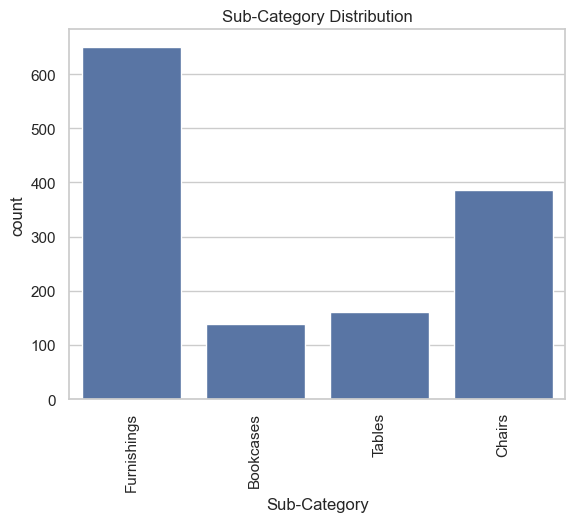

Sub-Category distribution after balancing:
 Sub-Category
Bookcases      650
Chairs         650
Furnishings    650
Tables         650
Name: count, dtype: int64


C:\Users\chenz\AppData\Local\Temp\ipykernel_49628\1762299795.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = store_sales.groupby('Sub-Category', group_keys=False).apply(lambda x: resample(x, replace=True, n_samples=max_class_size)).reset_index(drop=True)


In [39]:
# Checking the distribution of Sub-Categories
sub_category_distribution = store_sales['Sub-Category'].value_counts()
print("Sub-Category distribution:\n", sub_category_distribution)

# Visualising the distribution of Sub-Categories
sns.countplot(x='Sub-Category', data=store_sales)
plt.title('Sub-Category Distribution')
plt.xticks(rotation=90)
plt.show()

# Import the resample function from sklearn
from sklearn.utils import resample
# Processing of imbalance data (upsampling)
max_class_size = store_sales['Sub-Category'].value_counts().max()
balanced_data = store_sales.groupby('Sub-Category', group_keys=False).apply(lambda x: resample(x, replace=True, n_samples=max_class_size)).reset_index(drop=True)
print("Sub-Category distribution after balancing:\n", balanced_data['Sub-Category'].value_counts())

### Feature engineering and feature selection
Non-numerical features were processed using OneHot coding, and feature importance was calculated and significant features were selected using a random forest model

Feature Importances (Percent):
 Profit                      29.558856
City_Fresno                 10.493243
City_Buffalo                10.220994
Quantity                     9.684794
Sub-Category_Furnishings     8.725642
                              ...    
City_Georgetown              0.000000
City_Saint Peters            0.000000
City_Roswell                 0.000000
City_Farmington              0.000000
City_Pico Rivera             0.000000
Length: 338, dtype: float64
Top Feature Importances (Percent):
 Profit                      29.558856
City_Fresno                 10.493243
City_Buffalo                10.220994
Quantity                     9.684794
Sub-Category_Furnishings     8.725642
Discount                     3.074011
Sales_lag_1                  2.024225
Sales_lag_9                  1.804906
Sales_lag_12                 1.726733
Sales_lag_7                  1.649594
dtype: float64


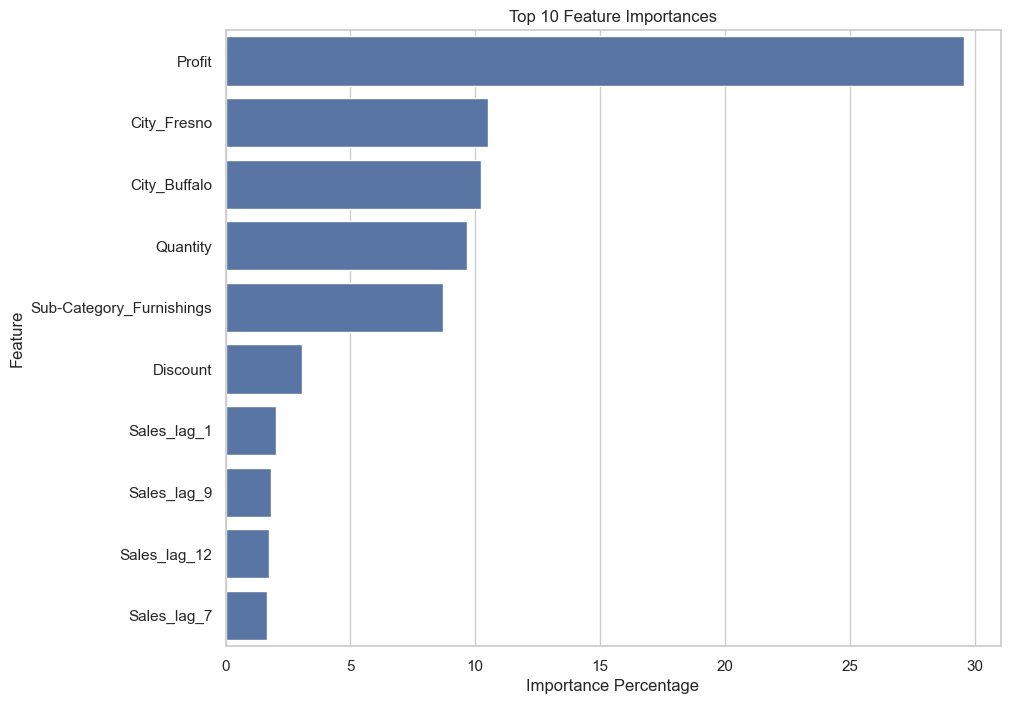

In [40]:
# import the necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Definition of classification features
categorical_features = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Sub-Category']

# Coding of numerical and categorical features handled separately
numeric_transformer = Pipeline(steps=[
    ('num', 'passthrough')
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_features)
    ])

# Perform encoding and conversion
balanced_data_encoded = preprocessor.fit_transform(balanced_data)

# Get the encoded feature name
encoded_feature_names = numeric_columns + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

# Transfer to DataFrame
balanced_data_encoded_df = pd.DataFrame(balanced_data_encoded.toarray(), columns=encoded_feature_names)

# Features and target variables
X = balanced_data_encoded_df
y = balanced_data['Sales']

# Training Random Forest Models for Feature Importance
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance and convert to percentage
feature_importances = pd.Series(model.feature_importances_, index=encoded_feature_names)
feature_importances_percent = feature_importances / feature_importances.sum() * 100

# mportance of print features
print("Feature Importances (Percent):\n", feature_importances_percent.sort_values(ascending=False))

# Select the most important features
top_features = feature_importances_percent.sort_values(ascending=False).index[:10]  

# Print the most important features and their percentages
print("Top Feature Importances (Percent):\n", feature_importances_percent[top_features])

# The most important features of visualisation
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_percent[top_features], y=top_features)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.show()

# Create a new dataset containing only the most important features and their corresponding data
important_features_df = pd.concat([balanced_data['Sales'], balanced_data_encoded_df[top_features]], axis=1)

# Save the new dataset to a CSV file
important_features_df.to_csv('important_features_data.csv', index=False)

## 4. Identify correlated variables

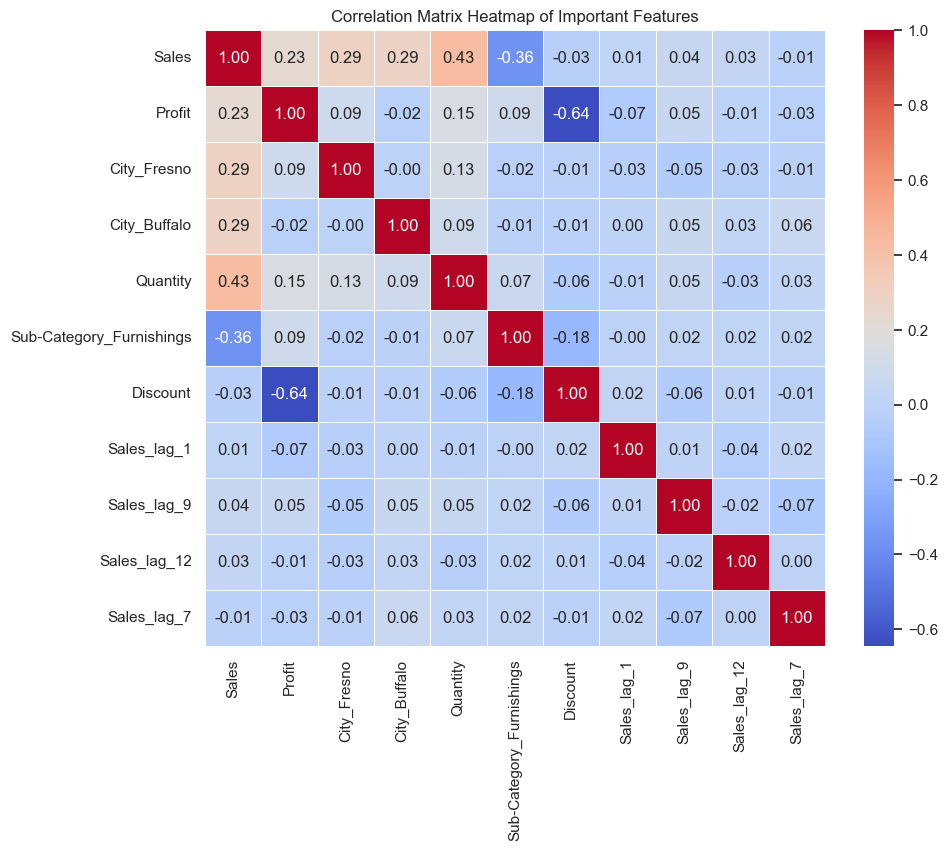

Highly Correlated Pairs in Important Features:
 Series([], dtype: float64)


In [58]:
# Load the dataset containing only the most important features
file_path = 'important_features_data.csv'
important_features_df = pd.read_csv(file_path)

# Calculate the correlation matrix
correlation_matrix = important_features_df.corr()

# Draw a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Important Features')
plt.show()

# Print the highly correlated pairs in the important features
high_corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.75) & (high_corr_pairs < 1.0)]
print("Highly Correlated Pairs in Important Features:\n", high_corr_pairs)

Remaining Features after dropping highly correlated features:
 Index(['Sales', 'Profit', 'City_Fresno', 'City_Buffalo', 'Quantity',
       'Sub-Category_Furnishings', 'Sales_lag_1', 'Sales_lag_9',
       'Sales_lag_12', 'Sales_lag_7'],
      dtype='object')


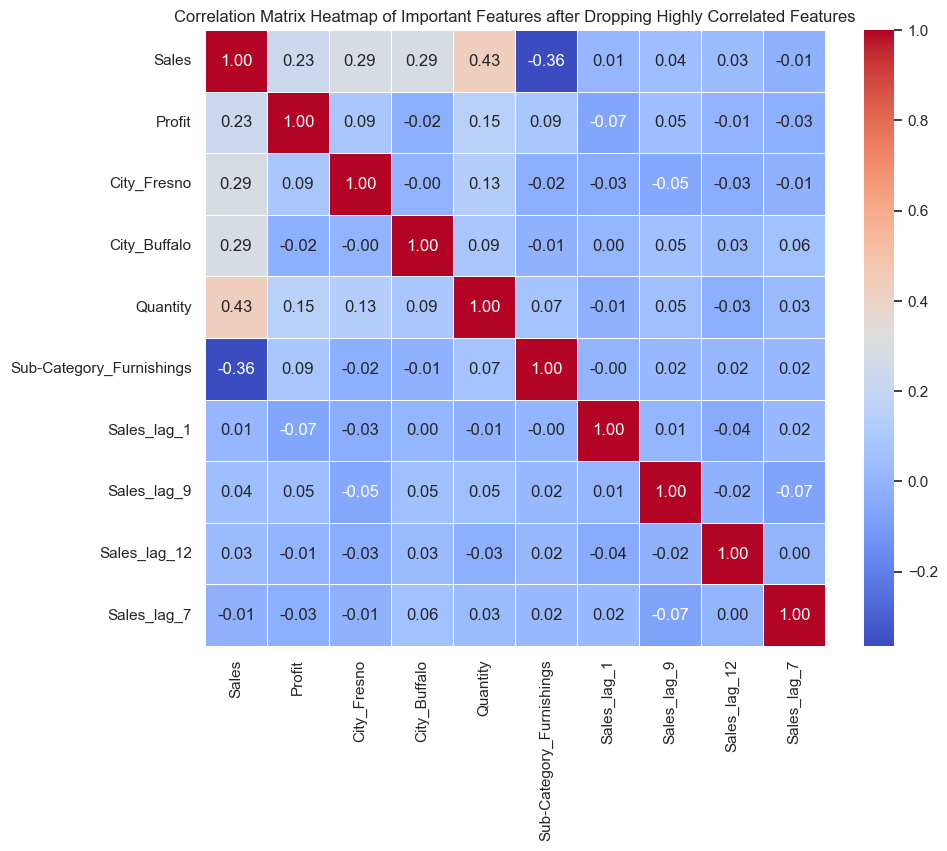

In [59]:
# According to the correlation analysis, the 'Discount' feature is highly correlated with other features
to_drop = ['Discount']  
final_features_df  = important_features_df.drop(columns=to_drop)

# Print the remaining features after dropping highly correlated features
print("Remaining Features after dropping highly correlated features:\n", final_features_df .columns)

# Calculate the correlation matrix after dropping highly correlated features
correlation_matrix_dropped = final_features_df .corr()

# Draw a heatmap of the correlation matrix after dropping highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dropped, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Important Features after Dropping Highly Correlated Features')
plt.show()

In [60]:
# Final features data
final_file_path = 'final_features_data.csv'
final_features_df.to_csv(final_file_path, index=False)

## 5. Summary

### EDA and Preprocessing Summary

We used Store X sales data for EDA and preprocessing to forecast future sales. We began by loading the dataset, printing a basic overview of columns and data types, and calculating key statistics. Numeric and non-numeric columns were visualized and analyzed separately.

For non-numeric columns, we categorized them into categorical and temporal features. Country and Category were deemed irrelevant, while other features highlighted regional and product category impacts on sales.

Time series decomposition was performed on temporal features to forecast sales, identify trends, capture seasonality, and understand feature relationships. We created time-correlated, lagged, rolling statistical, and time-difference features. 

- **Time feature plots**: Revealed annual sales growth, holiday peaks in November and December, highest sales in the fourth quarter, and weekday-weekend sales differences, with peak sales on Mondays and Saturdays, and the lowest on Wednesdays.
- **Lagged features**: Showed cyclical fluctuations, confirming the lag effect.
- **Rolling statistics**: Highlighted short-term and long-term sales fluctuations, identifying trends and anomalies.
- **Time lag graphs**: Indicated order-to-ship days did not significantly affect sales, with most orders shipped within 0-3 days, though high sales anomalies existed on each day.

For numerical columns, we displayed value distributions and used scatter plots to show relationships between numerical columns, sales, and profits.

In data cleaning, irrelevant features (e.g., ID column), Country and Category features with only one category, and the ProductName feature were removed to avoid processing extra overhead. No missing values were found in the dataset. After creating temporal features, we removed a small number of missing values due to lagged and rolling features. Outliers were processed using the IQR method, with a very small number removed. The Sub-Category column was upsampled to balance the dataset and improve model performance. 

Finally, non-numeric features were OneHot encoded, and feature importance was calculated using the Random Forest model. The top 10 features were selected and saved. Discount was found to be highly correlated with Sales and was removed to avoid redundancy and improve model generalization. The extracted features and corresponding data were saved for training.

